In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Homework for the DataTalks.Club Machine Learning Zoomcamp
## Week 2

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv > housing.csv

--2022-09-18 21:14:09--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.2’

housing.csv.2       100%[===================>]   1.36M  5.97MB/s    in 0.2s    

2022-09-18 21:14:09 (5.97 MB/s) - ‘housing.csv.2’ saved [1423529/1423529]



### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [3]:
data = pd.read_csv('housing.csv.1')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


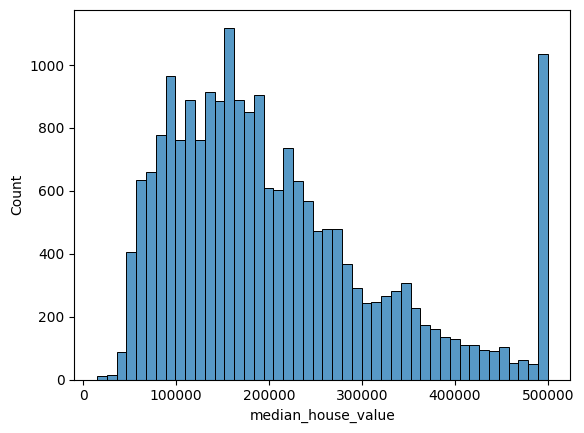

In [4]:
sns.histplot(data['median_house_value']);

Not exactly a long tail, but only because 500,000 seems to have been the highest possible value. I would decide against logarithmically transforming the data in this case.

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

In [5]:
data = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

### Question 1

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508

In [6]:
data.isnull().sum() # total_bedrooms has 207 missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188

In [7]:
data['population'].describe() # 1166

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [8]:
# Making a shuffled index array
index_array = np.array([i for i in range(len(data.index))])
np.random.seed(42)
np.random.shuffle(index_array)
index_array

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [9]:
# Implementing the new index to our dataframe and shuffleing it
data['shuffled_index'] = index_array
data.set_index(data['shuffled_index'], inplace=True)
data.drop(columns=['shuffled_index'], axis=1, inplace=True)
data = data.sort_index()
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
shuffled_index,,,,,,,,,
0,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0
1,-117.13,32.91,16.0,3230.0,579.0,1825.0,576.0,4.2969,151200.0
2,-117.95,33.81,33.0,1724.0,291.0,943.0,285.0,5.1180,195200.0
3,-119.77,36.73,45.0,1081.0,241.0,821.0,230.0,1.7829,52600.0
4,-117.19,34.94,31.0,2034.0,444.0,1097.0,367.0,2.1522,60800.0
...,...,...,...,...,...,...,...,...,...
20635,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0
20636,-118.11,33.80,35.0,1034.0,180.0,444.0,177.0,5.4602,231600.0
20637,-122.68,38.40,32.0,2826.0,627.0,1767.0,628.0,3.1047,141400.0


In [10]:
# Manual train-test-split
X_train = data.iloc[:int(data.shape[0]*0.6),:-1]
y_train = data.iloc[:int(data.shape[0]*0.6),-1]

X_val = data.iloc[int(data.shape[0]*0.6):int(data.shape[0]*0.8),:-1]
y_val = data.iloc[int(data.shape[0]*0.6):int(data.shape[0]*0.8),-1]

X_test = data.iloc[int(data.shape[0]*0.8):,:-1]
y_test = data.iloc[int(data.shape[0]*0.8):,-1]

In [11]:
# Checking if correct
len(y_val) + len(y_train) + len(y_test)

20640

In [12]:
# Transforming the target value logarithmically
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

In [13]:
# Substituting missing values with 0s

X_train_0s = X_train.copy()
X_train_0s['total_bedrooms'] = X_train_0s['total_bedrooms'].fillna(0)

X_val_0s = X_val.copy()
X_val_0s['total_bedrooms'] = X_val_0s['total_bedrooms'].fillna(0)

In [14]:
# Substituting missing values with the mean

mean_value = X_train['total_bedrooms'].describe()[1]

X_train_mean = X_train.copy()
X_train_mean['total_bedrooms'] = X_train_mean['total_bedrooms'].fillna(mean_value)

X_val_mean = X_val.copy()
X_val_mean['total_bedrooms'] = X_val_mean['total_bedrooms'].fillna(mean_value)

In [15]:
# Defining manual linear regression using the normal equation

def linear_regression(X, y):
    
    # adding the column of ones
    X['ones'] = np.ones(len(X))
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = np.array(X[cols])
    
    # calculating w with the normal equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    w0 = w[0]
    w = w[1:]
    
    return w0, w

In [16]:
# Retrieving the model for substitution with 0s
bias_0s, coefficients_0s = linear_regression(X_train_0s, y_train)

# Retrieving the model for substitution with the mean
bias_mean, coefficients_mean = linear_regression(X_train_mean, y_train)

In [17]:
# Making predictions on the validation set for the 0s

y_0s_pred = np.full((len(y_val), 1), bias_0s)

for i in range(X_val_0s.shape[0]):
    sample = X_val_0s.iloc[i, :]
    for j in range(len(sample)):
        value = X_val_0s.iloc[i, j]
        y_0s_pred[i] += value * coefficients_0s[j]
        
y_0s_pred[:5]

array([[12.06816478],
       [13.38301814],
       [11.80723913],
       [11.86415343],
       [12.03837176]])

In [18]:
# Making predictions on the validation set for the means

y_mean_pred = np.full((len(y_val), 1), bias_mean)

for i in range(X_val_mean.shape[0]):
    sample = X_val_mean.iloc[i, :]
    for j in range(len(sample)):
        value = X_val_mean.iloc[i, j]
        y_mean_pred[i] += value * coefficients_mean[j]
        
y_mean_pred[:5]

array([[12.06625049],
       [13.38676869],
       [11.80501121],
       [11.8684252 ],
       [12.03439261]])

In [19]:
# Checking if everything went alright
len(y_mean_pred) == len(y_0s_pred) == len(y_val)

True

In [20]:
# Calculating the RMSE

def rmse_calculator(y_pred, y_test):
    error = 0

    for i in range(len(np.array(y_test))):
        error += (np.array(y_test)[i] - y_pred[i])**2
        
    error = error / len(np.array(y_test))
    error = np.sqrt(error)
    return error[0]

In [21]:
print('The RMSE for substitution with zeros is: ', round(rmse_calculator(y_pred=y_0s_pred, y_test=y_val), 2))
print('The RMSE for substitution with the mean is: ', round(rmse_calculator(y_pred=y_mean_pred, y_test=y_val), 2))

The RMSE for substitution with zeros is:  0.34
The RMSE for substitution with the mean is:  0.34


### --> So, the score (RMSE) for both, substituting with 0s and with the mean is the same.

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001

In [22]:
# Substituting missing values with 0s

X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(0)
X_val['total_bedrooms'] = X_val['total_bedrooms'].fillna(0)

In [23]:
# Manual linear regression with regularization

def linear_regression_with_regularization(X, y, r):
    
    # adding the column of ones
    X['ones'] = np.ones(len(X))
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = np.array(X[cols])
    
    # calculating w with the normal equation
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0]) * r
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    w0 = w[0]
    w = w[1:]
    
    return w0, w

In [24]:
# Calling the linear regression with different regularisation params

r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_scores_list = []

for r in r_list:
    bias, coefficients = linear_regression_with_regularization(X_train, y_train, r)
    
    y_pred = np.full((len(y_val), 1), bias)
    
    for i in range(X_val.shape[0]):
        sample = X_val.iloc[i, :]
        for j in range(len(sample)):
            value = X_val.iloc[i, j]
            y_pred[i] += value * coefficients[j]
    
    rmse_scores_list.append(rmse_calculator(y_pred=y_pred, y_test=y_val))

In [25]:
rmse_scores_list

[0.33703670528229923,
 0.3370367081507356,
 0.33703699231552214,
 0.3370395889047349,
 0.33706683095595213,
 0.33743484879644275,
 0.34166828808650895,
 0.3467308572640016,
 0.347975027147151]

In [26]:
np.array(rmse_scores_list).min()

0.33703670528229923

### --> The first value is the lowest, thus r = 0 returns the best rmse.

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- 0.005
- 0.15555

In [27]:
# Experimenting with different seeds

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores_list = []

for seed in seeds:

    # Making a shuffled index array
    index_array = np.array([i for i in range(len(data.index))])
    np.random.seed(seed)
    np.random.shuffle(index_array)

    # Implementing the new index to our dataframe and shuffleing it
    data['shuffled_index'] = index_array
    data.set_index(data['shuffled_index'], inplace=True)
    data.drop(columns=['shuffled_index'], axis=1, inplace=True)
    data = data.sort_index()

    # Manual train-test-split
    X_train = data.iloc[:int(data.shape[0]*0.6),:-1]
    y_train = data.iloc[:int(data.shape[0]*0.6),-1]

    X_val = data.iloc[int(data.shape[0]*0.6):int(data.shape[0]*0.8),:-1]
    y_val = data.iloc[int(data.shape[0]*0.6):int(data.shape[0]*0.8),-1]

    X_test = data.iloc[int(data.shape[0]*0.8):,:-1]
    y_test = data.iloc[int(data.shape[0]*0.8):,-1]

    # Transforming the target value logarithmically
    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)

    # Substituting missing values with 0s
    X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(0)
    X_val['total_bedrooms'] = X_val['total_bedrooms'].fillna(0)

    bias, coefficients = linear_regression(X_train, y_train)
    
    y_pred = np.full((len(y_val), 1), bias)
    
    for i in range(X_val.shape[0]):
        sample = X_val.iloc[i, :]
        for j in range(len(sample)):
            value = X_val.iloc[i, j]
            y_pred[i] += value * coefficients[j]
    
    rmse_scores_list.append(rmse_calculator(y_pred=y_pred, y_test=y_val))

In [28]:
rmse_scores_list

[0.33989441532619546,
 0.3339578910975853,
 0.3404553070532869,
 0.3424087736653439,
 0.3415823027531844,
 0.3435063844891291,
 0.3356173234032092,
 0.34101887724953434,
 0.34981098920009696,
 0.34721713488536665]

In [29]:
# Standard deviation of the scores to test if you model is stable
np.array(rmse_scores_list).std()

0.004494267643355957

### --> The std is closest to 0.005, even though I would not have rounded it this way, which is a little strange ...

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245

In [31]:
# Making a shuffled index array
index_array = np.array([i for i in range(len(data.index))])
np.random.seed(9)
np.random.shuffle(index_array)

# Implementing the new index to our dataframe and shuffleing it
data['shuffled_index'] = index_array
data.set_index(data['shuffled_index'], inplace=True)
data.drop(columns=['shuffled_index'], axis=1, inplace=True)
data = data.sort_index()

# Manual train-test-split
X_train = data.iloc[:int(data.shape[0]*0.8),:-1]
y_train = data.iloc[:int(data.shape[0]*0.8),-1]

X_test = data.iloc[int(data.shape[0]*0.8):,:-1]
y_test = data.iloc[int(data.shape[0]*0.8):,-1]

# Transforming the target value logarithmically
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# Substituting missing values with 0s
X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(0)
X_test['total_bedrooms'] = X_test['total_bedrooms'].fillna(0)

bias, coefficients = linear_regression_with_regularization(X_train, y_train, r=0.001)

y_pred = np.full((len(y_test), 1), bias)

for i in range(X_test.shape[0]):
    sample = X_test.iloc[i, :]
    for j in range(len(sample)):
        value = X_test.iloc[i, j]
        y_pred[i] += value * coefficients[j]

rmse_calculator(y_pred=y_pred, y_test=y_test)

0.34758326510993004

### --> My RMSE is closest to 0.35.